<a href="https://colab.research.google.com/github/alphainterface-debug/Neural-Nets/blob/main/Neural%20Nets%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello world")

hello world


In [2]:
import keras as ks
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
print(tf.__version__)

2.5.0


In [36]:
dfw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")

In [37]:
dfw.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [38]:
dfr = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [10]:
dfr.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [11]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [12]:
dfw.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,4898
unique,3961
top,7.3;0.19;0.27;13.9;0.057;45;155;0.99807;2.94;0...
freq,8


In [7]:
dfw.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [39]:
str1 = 'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [40]:
str1

'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [41]:
dfw1 = dfw[str1].str.split(';',expand=True)

In [14]:
dfw.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [16]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [45]:
dfw1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [44]:
dfw1 = dfw1.rename(columns={0:'fixed acidity',1:'volatile acidity',2:"citric acid",3:"residual sugar",4:"chlorides",5:"free sulfur dioxide",6:"total sulfur dioxide",7:"density",8:"pH",9:"sulphates",10:"alcohol",11:"quality"})

In [46]:
dfr1 = dfr[str1].str.split(';',expand=True)

In [47]:
dfr1 = dfr1.rename({0:'fixed acidity',1:'volatile acidity',2:"citric acid",3:"residual sugar",4:"chlorides",5:"free sulfur dioxide",6:"total sulfur dioxide",7:"density",8:"pH",9:"sulphates",10:"alcohol",11:"quality"},axis='columns')

In [49]:
dfr1['type'] = 1
dfw1['type'] = 0

In [54]:
dfw1.head().transpose()

,0,1,2,3,4
fixed acidity,7,6.3,8.1,7.2,7.2
volatile acidity,0.27,0.3,0.28,0.23,0.23
citric acid,0.36,0.34,0.4,0.32,0.32
residual sugar,20.7,1.6,6.9,8.5,8.5
chlorides,0.045,0.049,0.05,0.058,0.058
free sulfur dioxide,45,14,30,47,47
total sulfur dioxide,170,132,97,186,186
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3,3.3,3.26,3.19,3.19
sulphates,0.45,0.49,0.44,0.4,0.4


In [56]:
dfr1 = dfr1.append(dfw1,ignore_index=True)

In [52]:
dfr1.head().transpose()

,0,1,2,3,4
fixed acidity,7.4,7.8,7.8,11.2,7.4
volatile acidity,0.7,0.88,0.76,0.28,0.7
citric acid,0,0,0.04,0.56,0
residual sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free sulfur dioxide,11,25,15,17,11
total sulfur dioxide,34,67,54,60,34
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


In [32]:
pd.isnull(dfr1).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [57]:
dfr1['type'].unique()

array([1, 0])

In [69]:
dfr1['fixed acidity'].value_counts()

6.8     354
6.6     327
6.4     305
7       282
6.9     279
       ... 
13.5      1
3.9       1
3.8       1
14.2      1
4.5       1
Name: fixed acidity, Length: 106, dtype: int64

In [59]:
import seaborn as sns

In [61]:
dfr1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1


In [74]:
dfr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  type                  6497 non-null   float64
dtypes: float64(13)
memory usage: 660.0 KB


In [73]:
dfr1= dfr1.astype('float64')

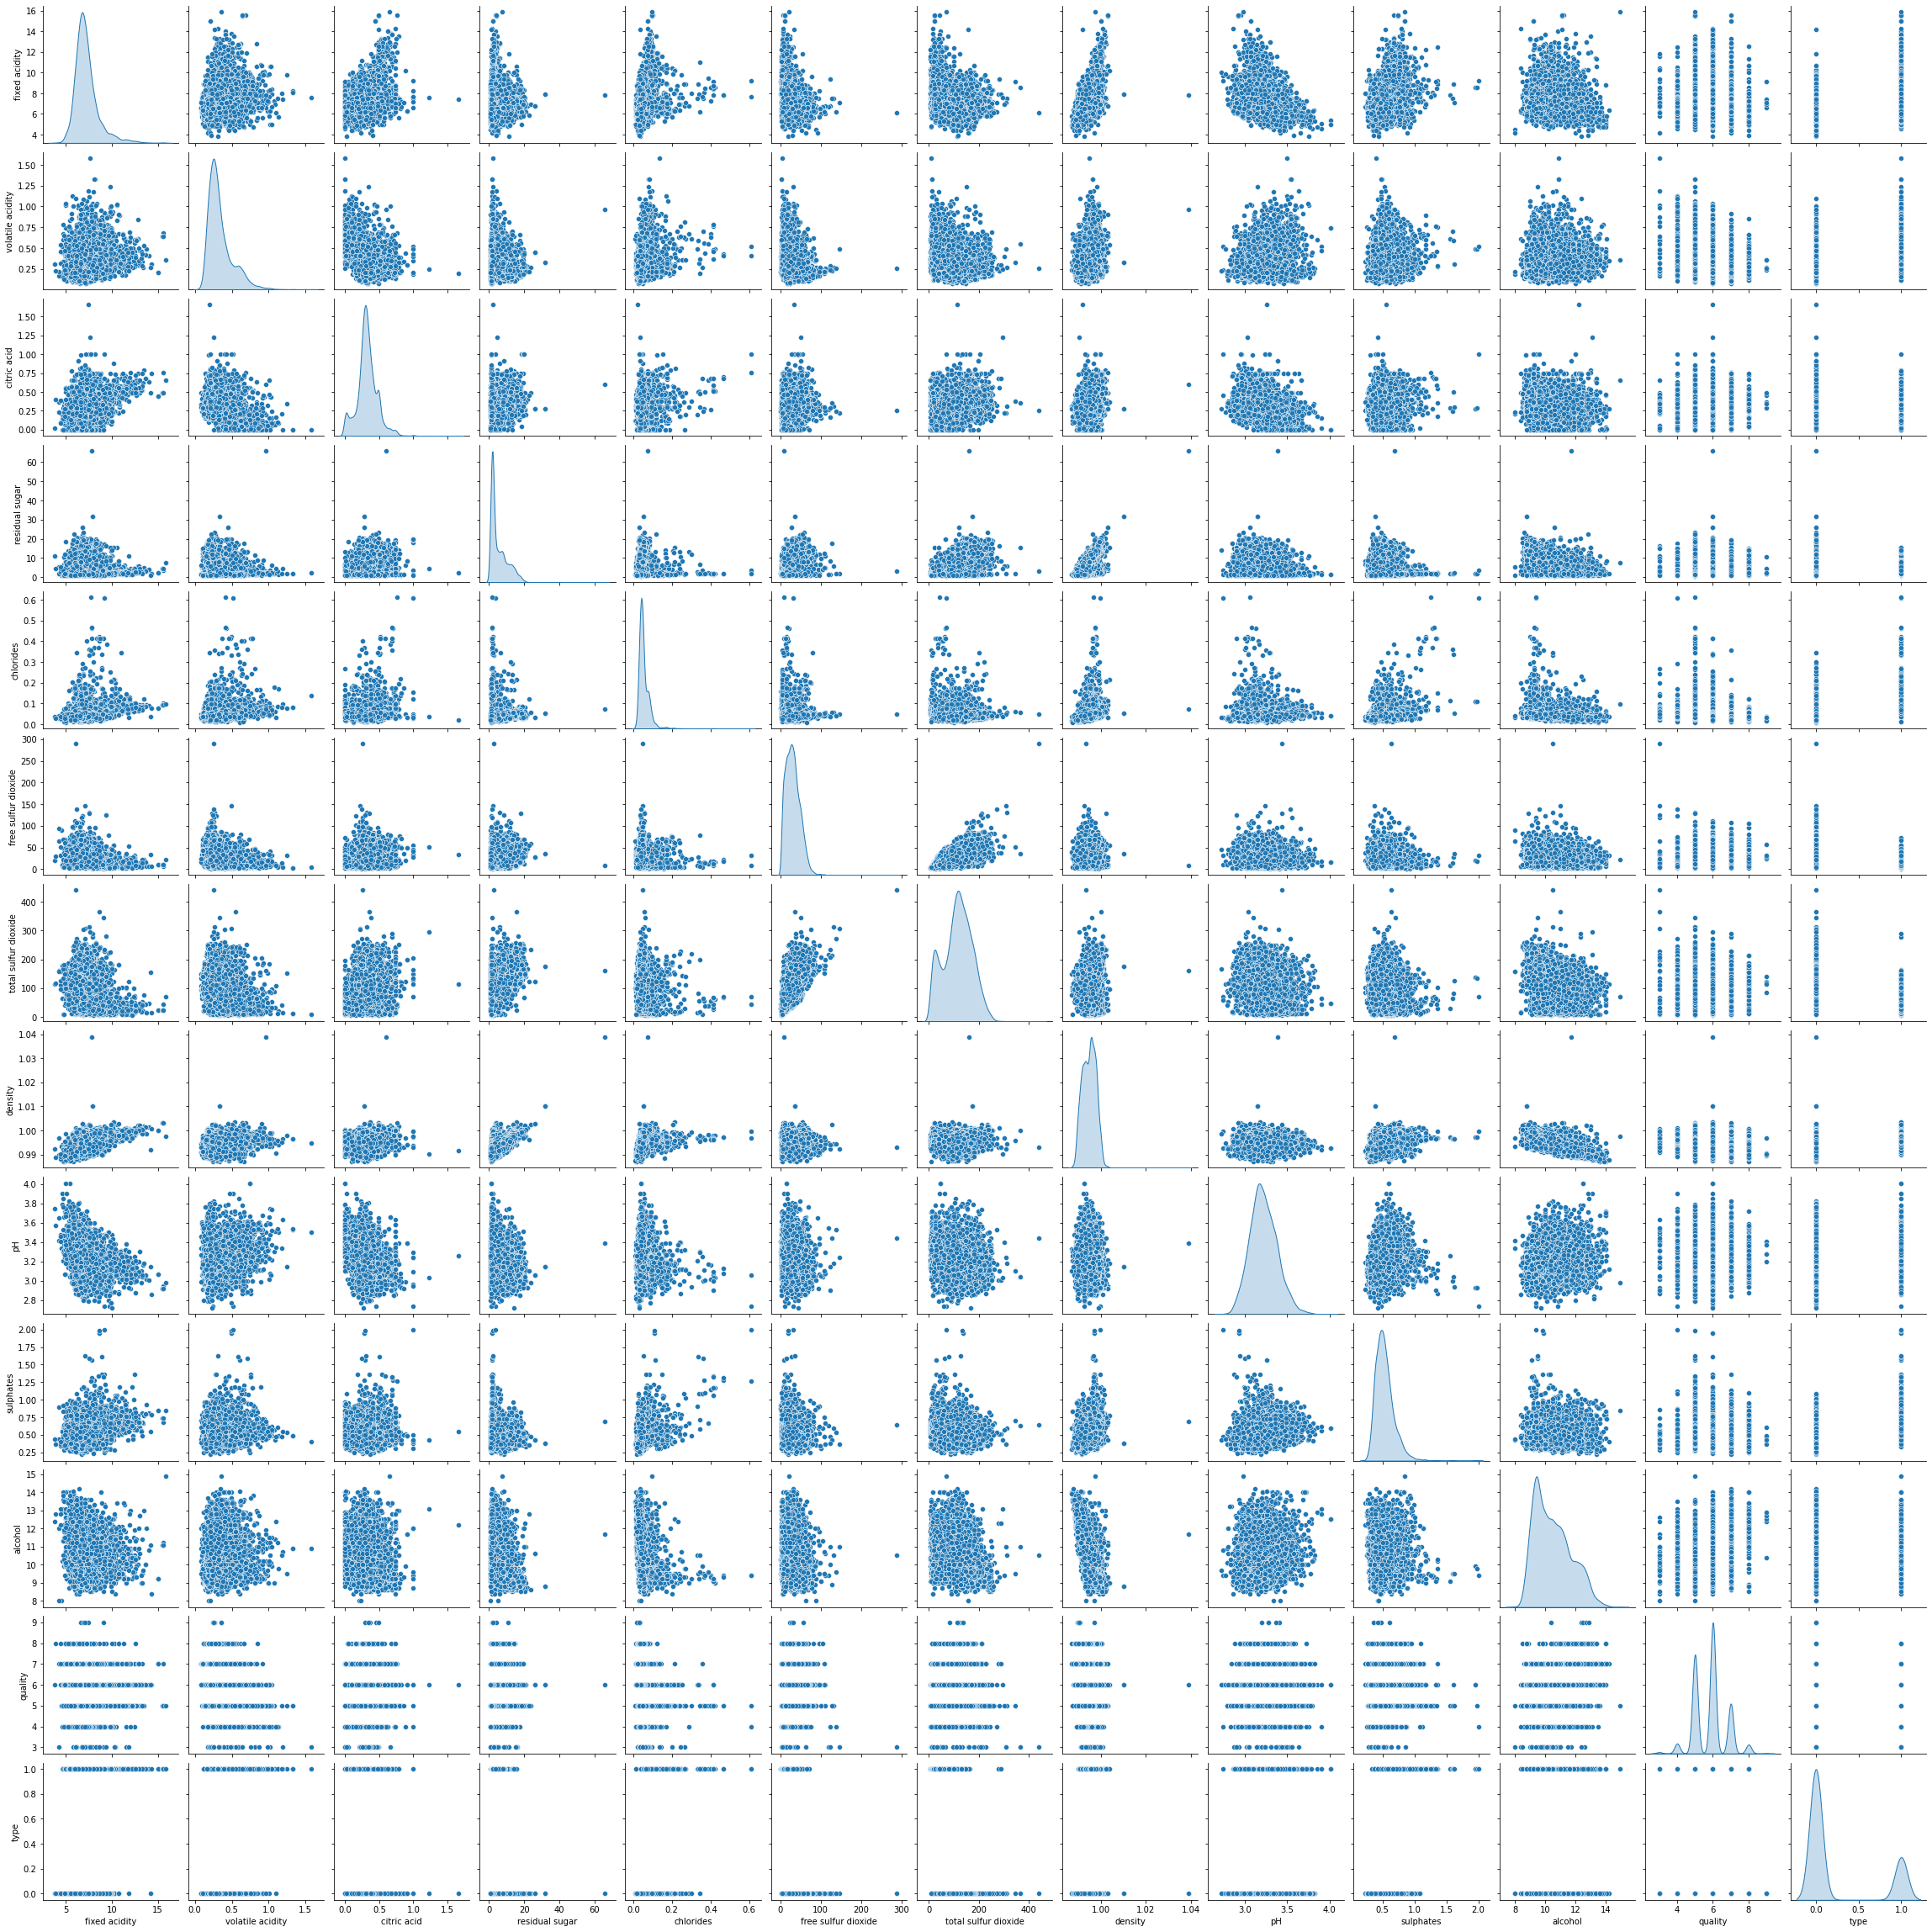

In [75]:
sns.pairplot(dfr1,diag_kind='kde')

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu


In [103]:
NNmodel = Sequential()

In [104]:
NNmodel.add(Dense(8,activation='relu',input_shape=(12,)))

In [105]:
NNmodel.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['binary_accuracy'])


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = dfr1.iloc[:,:-1]
y = dfr1.iloc[:,-1]

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [99]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [112]:
epoch = 200
batchsize = 50000  
history = NNmodel.fit(X_train,y_train,epochs=epoch,batch_size=batchsize,validation_split=0.3)

Epoch 1/200
1/1 [==============================] - 0s 70ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4339 - val_binary_accuracy: 0.7699
Epoch 2/200
1/1 [==============================] - 0s 24ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4343 - val_binary_accuracy: 0.7699
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4343 - val_binary_accuracy: 0.7699
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4335 - val_binary_accuracy: 0.7700
Epoch 5/200
1/1 [==============================] - 0s 19ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4334 - val_binary_accuracy: 0.7700
Epoch 6/200
1/1 [==============================] - 0s 20ms/step - loss: 3.5478 - binary_accuracy: 0.7643 - val_loss: 3.4333 - val_binary_accuracy: 0.7700
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 3.54

In [118]:
loss,accuracy = NNmodel.evaluate(X_test,y_test)

61/61 [==============================] - 0s 2ms/step - loss: 3.6571 - binary_accuracy: 0.7560


In [102]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: type, Length: 6497, dtype: float64

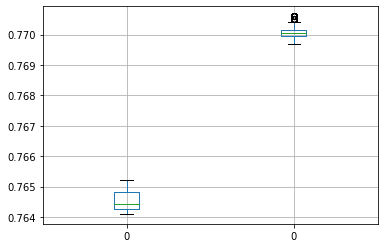

In [127]:

df1 = pd.DataFrame(history.history['binary_accuracy'])
df2 = pd.DataFrame(history.history['val_binary_accuracy'])
forbx = pd.concat([df1,df2],axis = 1)
forbx.boxplot()
